# __Projet de Math - Modèle proie-prédateur de Lotka-Volterra__
Pierre DENIG & Théo COMMUNAL


In [2]:
from math import *
import numpy as np
import matplotlib.pyplot as plt

On considère le système d'équations différentielles suivant : $$ (LV) = \begin{cases} \dot{x_1} = x_1(\alpha - \beta x_2) \\ \dot{x_2} = -x_2(\gamma -  \delta x_1) \end{cases}$$
où $x_1$ et $x_2$ désignent respectivement le nombre de proies et de prédateurs et où $\alpha,\beta,\gamma,\delta > 0$. 

## __Réponse 1__ 

Dans une telle dynamique, on peut intuitivement se dire que plus le nombre de prédateur est élevé plus le nombre de proie tend à diminuer. Se faisant, la quantité de nourriture disponible pour les prédateurs diminue ce qui entraîne donc une baisse de la population de prédateurs. Ainsi, ayant moins de prédateurs, la population de proie peut proliférer plus facilement. 

On peut donc déjà raisonnablement penser qu'une telle dynamique doit présenter un cycle limite. 

La population de proie dépend de son taux de reproduction ($T_{Rproie}$) qui est indépendant du nombre de prédateur ainsi que de son taux de mortalité ($T_{Mproie}$=par rapport au nombre de proies rencontrées. On a donc $\dot{x_1} = T_{Rproie}x_1 - T_{Mproie}x_1x_2$. 

La population de prédateur dépend de son taux de mortalité ($T_{Mprédateur}$) qui est indépendant du nombre de proies ainsi que de son taux de reproduction ($T_{Rprédateur}$) en fonction du nombe de proies disponibles. On a donc $\dot{x_2} = -T_{Mprédateur}x_2 + T_{Rprédateur}x_1x_2$.

Ainsi on a $\begin{cases} \alpha = T_{Rproie} \\ \beta = T_{Mproie} \\ \gamma = T_{Mprédateur} \\ \delta = T_{Rprédateur} \end{cases}$.

--- 

Soit $f(x,y) = (x(\alpha - \beta y) , -y(\gamma - \delta x))$. On a $J_f(x,y) = \left(\begin{matrix} \alpha - \beta y & -\beta x  \\ \delta y & \delta x - \gamma \end{matrix} \right)$. 

On a $f(0,0) = (0,0)$ donc $(0,0)$ est un point d'équilibre. De même $f(\frac{\gamma}{\delta},\frac{\alpha}{\beta}) = (0,0)$ donc $\bar{x} = (\frac{\gamma}{\delta},\frac{\alpha}{\beta})$ est aussi un point d'équilibre. 

On a donc $J_f(0,0) = \left(\begin{matrix} \alpha & 0 \\ 0 & -\gamma \end{matrix}\right)$. Donc $det(J_f(0,0)) = -\gamma\alpha < 0$. Donc $(0,0)$ n'est pas un point stable. 

On a $J_f(\bar{x}) = \left(\begin{matrix} 0 & - \frac{\beta \gamma}{\delta} \\ \frac{\delta \alpha}{\beta} & 0 \end{matrix}\right)$. Donc $det(J_f(\bar{x}))= 0$. On ne peut donc pas conclure sur la stabilité de ce point d'équilibre pour le moment. 

## __Réponse 2__

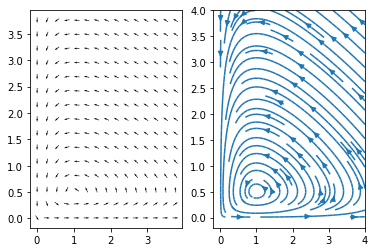

In [3]:
alpha = 2/3
beta = 4/3
gamma = 1
delta = 1

def f(t,x):
    return np.array([x[0]*(alpha - beta *x[1]),-x[1]*(gamma - delta*x[0])])

X = np.linspace(0.01,4,150)
Y = np.linspace(0.01,4,150)
X,Y = np.meshgrid(X,Y)
U= f(0,[X,Y])
A,B = U[0,:,:],U[1,:,:]
C,D = A/np.sqrt(A**2 + B**2),B/np.sqrt(A**2 + B**2) #On normalise pour mieux voir
plt.subplot(121)
plt.quiver(X[::10,::10],Y[::10,::10],C[::10,::10],D[::10,::10],pivot = 'mid');
plt.subplot(122)
plt.streamplot(X,Y,A,B);

On voit donc que les solutions oscillent autour du point d'équilibre $(\frac{\gamma}{\delta},\frac{\alpha}{\beta})$ qui est donc un foyer du système. 

## __Réponse 3__

La fonction $f$ est clairement continûement différentiable sur $\mathbb{R}$. On note $(x_1^0,x_2^0) \in \mathbb{R}_+^*  \times \mathbb{R}_+^*$ l'initialisation du système et $X(t) = (x_1(t),x_2(t))$ une solution de $\dot{X} = f(X)$.

Supposons qu'il existe $t_1 > t_0$ tel que $x_1(t_1) < 0$. Comme $x_1$ est continue et dérivable, d'après le théorème des valeurs intermédiaires, il existe $t_2 \in ]t_0,t_1[$ tel que $x_1(t_2) = 0$. Or la solution $\tilde{X}(t) = (0, e^{-\gamma(t-t_2)})$ est une solution du problème de Cauchy initialisé avec (0,1). Donc d'après le théorème de Cauchy-Lipschitz c'est impossible. Donc il n'existe pas de tel $t_1$. Donc $x_1^0 > 0 \iff \forall t \in \mathbb{R}\, x_1(t) > 0$. On a le même résultat sur $x_2$ en remplaçant $\gamma$ par $-\alpha$. 

Donc toute solution initialisée dans $\mathbb{R}_+^*  \times \mathbb{R}_+^*$ y reste. 

## __Réponse 4__ 

On considère $H(x,y) = \delta x  - \gamma ln(x)  + \beta y - \alpha ln(y)$. 
Soit $(x_1,x_2)$ une solution maximale initialisée dans $\mathbb{R}_+^*  \times \mathbb{R}_+^*$. 
On note $I = ]t^-,t^+[$ le domaine de définition de la solution. 

On pose $\tilde{H}(t) = H(x_1(t),x_2(t))$, d'après la question précédente, H est bien définie sur $I$. On a donc $$\dot{\tilde{H}}(t) = \delta \dot{x_1}(t) - \gamma \frac{\dot{x_1}(t)}{x_1(t)} + \beta \dot{x_2}(t) - \alpha \frac{\dot{x_2}(t)}{x_2(t)}$$ $$ = \dot{x_1}(t)(\delta - \frac{\gamma}{x_1(t)}) + \dot{x_2}(t)(\beta - \frac{\alpha}{x_2(t)})$$ $$= x_1(t)(\alpha - \beta x_2(t))(\delta - \frac{\gamma}{x_1(t)}) - x_2(t)(\gamma - \delta x_1(t))(\beta - \frac{\alpha}{x_2(t)})$$ $$ = 0$$

Donc $\forall t \in I, \dot{\tilde{H}}(t) = 0$, donc $\exists E \in \mathbb{R}$ telle que $\forall t \in I, \tilde{H}(t) = E$. 

D'après le théorème d'existance des solutions, si $I \neq \mathbb{R}$ alors $\lim_{x\rightarrow t^+}\|(x_1(t),x_2(t))\| = \infty$. Donc on aurait $\lim_{x\rightarrow t^+}\tilde{H}(t) = \infty$ ce qui est absurde ! Donc les solutions sont bien définies sur $\mathbb{R}$ entier. 

Soit $V(x,y) = H(x,y) - H(\bar{x})$. Posons $g_{a,b}(x) = a(x-\frac{b}{a}) - bln(\frac{ax}{b})$. On a $\lim_{x \rightarrow 0^+} g_{a,b}(x) = \infty$ et $g_{a,b}(\frac{b}{a}) = 0$. De plus $g_{a,b}'(x) = a-\frac{b}{x}$. Donc $g_{a,b}$ est décroissante sur $]0,\frac{b}{a}]$ et croissante sur $[\frac{b}{a},\infty[$. Donc $g_{a,b}$ est positive sur $\mathbb{R}_+^*$. 

On a $V(x,y) = g_{\delta,\gamma}(x) + g_{\beta,\alpha}(y)$. Donc $V$ est strictement positive sur $(\mathbb{R}_+^*\times\mathbb{R}_+^* - \{\bar{x}\})$ et $V(\bar{x}) = 0$. 

On a $\nabla V(x,y) = (g_{\delta,\gamma}'(x),g_{\beta,\alpha}'(y)) = (\delta - \frac{\gamma}{x}, \beta-\frac{\alpha}{y})$. 

Ainsi, $\langle\nabla V(x,y) | f(x,y)\rangle = 0 $

D'où $\forall (x,y) \in \mathbb{R}_+^*\times\mathbb{R}_+^* \, \langle\nabla V(x,y) | f(x,y)\rangle \leq 0$. Donc $V$ est une fonction de Lyapounov du système et le point $\bar{x}$ est stable. 

## __Réponse 5__

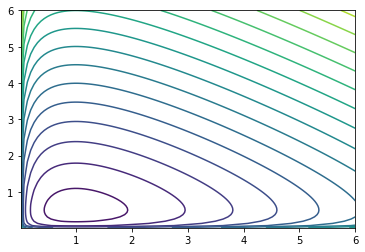

In [4]:
def H(x):
    return delta*x[0] - gamma*np.log(x[0]) + beta*x[1] - alpha*np.log(x[1])

X = np.linspace(0.01,6,100)
Y = np.linspace(0.01,6,100)
X,Y = np.meshgrid(X,Y)
Z = H([X,Y])
plt.contour(X,Y,Z,levels = 15);

On en déduit que les solutions sont bornées et sont cycliques. 


## __Réponse 6__

In [5]:
def solve_euler_explicit(f,x0,dt,t0,tf):
    T = [t0]
    X = [x0]
    while T[-1] < tf :
        X.append(X[-1] + dt*f(T[-1],X[-1]))
        T.append(T[-1]+dt)
    return np.array(X),np.array(T)

### Test sur la fonction exponentielle

Text(0.5, 0, 't')

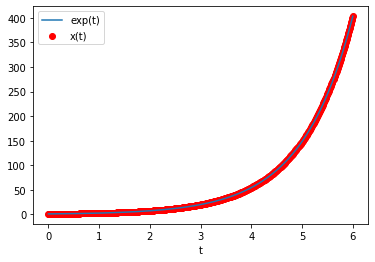

In [13]:
def f_1(t,x):
    return x

X,T = solve_euler_explicit(f_1,1,10**(-6),0,6)
X_0 = np.exp(T)
plt.scatter(T[::10000],X[::10000],label = 'x(t)',c = 'r');
plt.plot(T,X_0,label = 'exp(t)');
plt.legend();
plt.xlabel("t")

### __Test sur la fonction tan__

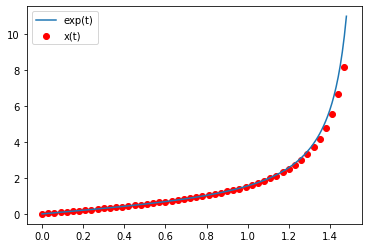

In [8]:
def f_2(t,x):
    return 1 + x**2

X,T = solve_euler_explicit(f_2,0,0.01,0,np.pi/2-0.1)
X_0 = np.tan(T)
plt.scatter(T[::3],X[::3],label = 'x(t)',c = 'r');
plt.plot(T,X_0,label = 'exp(t)');
plt.legend();

### __Visualisation convergence__

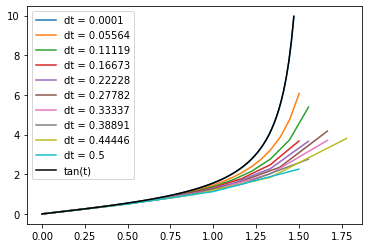

In [16]:
DT = np.round(np.linspace(10**(-4),0.5,10),5)
for i in range(10):
    X,T = solve_euler_explicit(f_2,0,DT[i],0,np.pi/2-0.1)
    plt.plot(T,X, label = 'dt = '+str(DT[i]))
T = np.linspace(0,np.pi/2 - 0.1,100)
plt.plot(T,np.tan(T),label='tan(t)',c='black');
plt.legend();

### __Visualisation de l'ordre__

Supposons que le schéma soit d'ordre $p \in \mathbb{N}$. Alors en notant $\eta(\Delta T) = \max_{0 \leq j \ J}\|\eta^j(\Delta t)\|$ on doit avoir $0 < \lim_{\Delta t \rightarrow 0^+}  \frac{\eta(\Delta T)}{{\Delta t}^p} < \infty$. 

Il a déjà été prouvé que le schéma d'Euler explicite est convergent d'ordre 1. Donc on montre que $0 < \lim_{\Delta t \rightarrow 0^+}  \frac{\eta(\Delta T)}{\Delta t} < \infty$ ce qui revient à montrer que $\eta(\Delta T)$ est une fonction linéaire de $\Delta t$. 

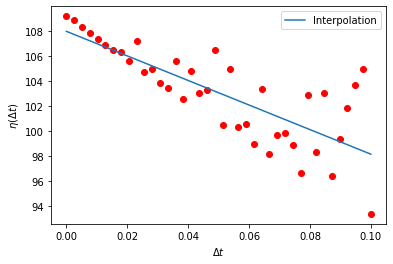

In [10]:
N = 40
DT = np.linspace(10**-6,0.1,N)
eta = []
for i in range(N):
    X,T = solve_euler_explicit(f_1,1,DT[i],0,4)
    X0 = np.exp(T)
    eta.append(max(np.abs(X0-X)/DT[i]))

AB = np.polyfit(DT,eta,1)
x = np.linspace(DT[0],DT[-1],1000)
y = AB[0]*x + AB[1]
plt.plot(x,y,label = 'Interpolation');
plt.scatter(DT,eta,c='r');
plt.legend()
plt.xlabel("$\Delta t$")
plt.ylabel("$\eta(\Delta t)$");

On a donc bien un schéma d'ordre de convergence égal à 1. 

## __Réponse 7__

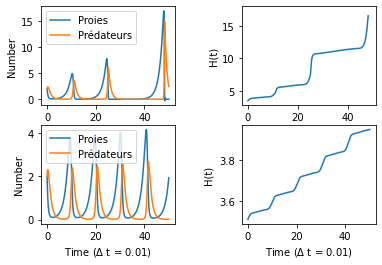

In [15]:
x0 = np.array([2,2])
X,T = solve_euler_explicit(f,x0,0.1,0,50)

fig = plt.figure()
gs = fig.add_gridspec(2,2, wspace = 0.5)

ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[0,1])
ax4 = fig.add_subplot(gs[1,1])




ax1.plot(T,X)
ax1.legend(["Proies","Prédateurs"]);
ax1.set_xlabel("Time ($\Delta$ t = 0.01)")
ax1.set_ylabel("Number");

H0 = [H(X[i]) for i in range(len(X))]
ax3.plot(T,H0);
ax3.set_xlabel("Time ($\Delta$ t = 0.1)")
ax3.set_ylabel("H(t)");

X,T = solve_euler_explicit(f,x0,0.01,0,50)

ax2.plot(T,X)
ax2.legend(["Proies","Prédateurs"]);
ax2.set_xlabel("Time ($\Delta$ t = 0.01)")
ax2.set_ylabel("Number");


H0 = [H(X[i]) for i in range(len(X))]
ax4.plot(T,H0);
ax4.set_xlabel("Time ($\Delta$ t = 0.01)")
ax4.set_ylabel("H(t) ");

On remarque donc que les solutions approchées ne sont pas périodiques et que $H$ ne se conserve pas. Les solutions ont tendence à diverger et $H$ à augmenter. Cependant on voit que l'amélioration de $\Delta t$ améliore la périodicité des solutions approchées et la conservation de $H$.

De plus, on voit qu'avec $\Delta t = 0.1$ on omet des cycles qui sont présents avec $\Delta t = 0.01$. 

## __Réponse 8__

In [12]:
def solve_euler_implicit(f, x0, dt, t0, tf, itermax = 100):
    T = [t0]
    X = [x0]
    while T[-1] < tf :
        x = X[-1]
        for i in range(itermax):
            x = X[-1] + dt*f(T[-1]+dt,x)
        X.append(x)
        T.append(T[-1]+dt)
    return np.array(X),np.array(T)

### __Test sur la fonction cos__

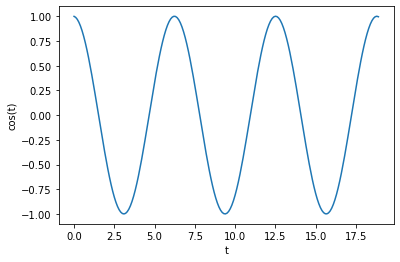

In [13]:
def f_3(t,x):
    return -sin(t)

X,T = solve_euler_implicit(f_3,1,0.1,0,6*np.pi)

plt.plot(T,X);
plt.xlabel("t")
plt.ylabel("cos(t)");

### __Application au système de Lotka-Volterra__

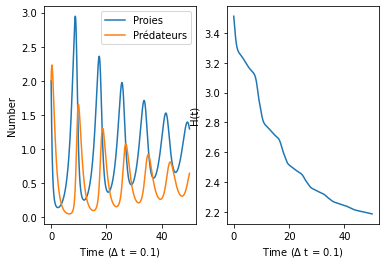

In [14]:
x0 = np.array([2,2])
X,T = solve_euler_implicit(f,x0,0.1,0,50)
plt.subplot(121)
plt.plot(T,X)
plt.legend(["Proies","Prédateurs"]);
plt.xlabel("Time ($\Delta$ t = 0.1)")
plt.ylabel("Number");
plt.subplot(122)
H0 = [H(X[i]) for i in range(len(X))]
plt.plot(T,H0);
plt.xlabel("Time ($\Delta$ t = 0.1)")
plt.ylabel("H(t)");



On observe ici le phénomène inverse que ce qui se passe avec la méthode explicite. Les solutions ont tendance à converger vers 0 et $H$ à diminuer. Cependant on voit qu'on omet aucun cycle même avec $\Delta t = 0.1$ donc la méthode est effectivement meilleure au sens où on a pas de perte d'information au niveau du nombre de cycle. Par contre, la méthode n'est toujours pas satisfaisante car on a toujours pas la périodicité des solutions et la conservation de $H$.

## __Réponse 9__

Soit $H_0 \in \mathbb{R}$ et $u = (u_1,u_2) : \mathbb{R}^2 \rightarrow \mathbb{R}^2$. On considère le système $$(S) = \begin{cases} \dot{x_1} = x_1(\alpha - \beta x_2) - u_1(x_1,x_2)(H(x_1,x_2) - H_0) \\ \dot{x_2} = -x_2(\gamma - \delta x_2) - u_2(x_1,x_2)(H(x_1,x_2) - H_0) \end{cases}$$

On a prouvé que $H$ était constante le long des solutions donc si $x$ est une solution de $(LV)$ et $H_0 = H(x(0))$ alors $\forall t \in \mathbb{R}\,H(x(t)) - H_0 = 0$. Donc $x$ est solution de $(S)$. 

Réciproquement, soit $x = (x_1,x_2)$ une solution de $(S)$ et supposons $H_0 = H(x(0))$. On pose  $\tilde{H}(t) = H(x(t)) - H_0$. Ainsi on a $$\dot{\tilde{H}}(t) = \dot{x_1}(t)(\delta - \frac{\gamma}{x_1(t)}) + \dot{x_2}(t)(\beta - \frac{\alpha}{x_2(t)})$$ $$ = [x_1(\alpha - \beta x_2) - u_1(x_1,x_2)(H(x_1,x_2) - H_0)](\delta - \frac{\gamma}{x_1(t)}) - [x_2(\gamma - \delta x_2) - u_2(x_1,x_2)(H(x_1,x_2) - H_0)](\beta - \frac{\alpha}{x_2(t)})$$ $$ = [u_2(x_1,x_2)\tilde{H}(t)](\beta - \frac{\alpha}{x_2(t)})- [u_1(x_1,x_2)\tilde{H}(t)](\delta - \frac{\gamma}{x_1(t)})$$ $$ = \tilde{H}(t)[u_2(x_1,x_2)((\beta - \frac{\alpha}{x_2(t)}) - u_1(x_1,x_2)(\delta - \frac{\gamma}{x_1(t)})]$$

Donc en posant $\lambda(t) = u_2(x_1,x_2)((\beta - \frac{\alpha}{x_2(t)}) - u_1(x_1,x_2)(\delta - \frac{\gamma}{x_1(t)})$ on a donc $\dot{\tilde{H}}(t) = \lambda(t)\tilde{H}(t)$. Or $x_1,x_2$ étant bornées, ne s'annulant pas et de classe $C^1$ on a donc $\lambda$ continûement différentiable. Ainsi, comme $\tilde{H}(0) = 0$, d'après le théorème de Cauchy-Lipschitz on a $\tilde{H} = 0$. Donc $H$ est constante et donc $x$ est solution de $(LV)$. 

Ainsi, on a $\forall u:\mathbb{R}^2 \rightarrow \mathbb{R}^2\,,\, x \, solution \, de \, (S) \iff x \, solution \, de \, (LV)$

## __Réponse 10__

Soit $H_0 \in \mathbb{R}$. On note toujours $\tilde{H(t)} = H(t) - H_0$.

D'après ce qui précède on a $\dot{\tilde{H}}(t) = \tilde{H}(t)[u_2(x_1,x_2)((\beta - \frac{\alpha}{x_2(t)}) - u_1(x_1,x_2)(\delta - \frac{\gamma}{x_1(t)})] = \lambda(t)\tilde{H}(t)$ 

Or en notant $p(t) = (p_1(t),p_2(t)) = (\frac{\gamma}{x_1(t)} - \delta,\beta - \frac{\alpha}{x_2(t)})$ on a $\lambda(t) = \langle u(t) | p(t) \rangle$. 


De plus $\nabla H(x(t)) = (\delta - \frac{\gamma}{x_1(t)}, \beta - \frac{\alpha}{x_2(t)}) = (-p_1(t),p_2(t))$ donc en prenant $u(t) = -k(p_1(t),p_2(t))$ on a $\lambda(t) = -k(p_1(t)^2 + p_2(t)^2) = -k\|\nabla H(x(t))\|^2$.

Donc il est possible de choisir $u$ telle que $\dot{\tilde{H}}(t) = -k\|\nabla H(x(t))\|^2\tilde{H}(t)$.

Si $x$ reste à une distance strictement positive de $\bar{x}$ alors $\forall t \in \mathbb{R}\,,\, \|\nabla H(x(t))\| > 0$. On a $lim_{\|x,y\|\rightarrow \infty \, ,\,x,y > 0} \|\nabla H(x,y)\| = \infty$, donc $\|\nabla H\|$ étant continue, elle atteint son minimum sur $\mathbb{R}^2$. En notant $m$ ce minimum on a :
- dans le cas $\tilde{H}$ positif :  $\dot{\tilde{H}}(t) \leq -km^2\tilde{H}(t)$. Donc il existe $C \geq 0$ tel que $\forall t \in \mathbb{R} \,,\,\tilde{H}(t) \leq Ce^{-km^2t}$ (1). 
- dans le cas $\tilde{H}$ négatif :  $\dot{\tilde{H}}(t) \geq -km^2\tilde{H}(t)$. Donc il existe $C \leq 0$ tel que $\forall t \in \mathbb{R} \,,\,\tilde{H}(t) \geq Ce^{-km^2t}$ (2). 

Ainsi $H$ croît / décroît exponentiellement vers $H_0$ puisque $\tilde{H}$ ne peut changer de signe (3). 



(1) En effet, supposons $f$ une fonction positive vérifiant $\dot{f} + km² f \leq 0$. En posant $g = \dot{f} + km^2 f \leq 0$ on a d'après la forme générale des solutions d'une équation différentielle du premier ordre : $f(t) = e^{-k m² t}(C + \int^t_{t_0} g(s)e^{km² s} ds) $. Or $\int^t_{t_0} g(s)e^{km² s} ds \leq 0$. Donc $f(t) \leq Ce^{-km²t}$ avec $C = f(0) \geq 0$. 

(2) En reprenant les notations de (1) on a cette fois $g = \dot{f} + km^2 f \geq 0$ donc $f(t) = e^{-k m² t}(C + \int^t_{t_0} g(s)e^{km² s} ds)  \geq Ce^{-km²t}$ avec $C = f(0) \leq 0$.

(3) Supposons qu'ils existent $x_1,x_2 \in \mathbb{R}$ tel que $\tilde{H}(x_1) < 0$ et  $\tilde{H}(x_2) > 0$. Alors par continuité de $\tilde{H}$ et d'après le théorème des valeurs intermédiaires, il existe $x_0 \in ]x_1,x_2[$ tel que $\tilde{H}(x_0) = 0$. Donc $\dot{\tilde{H}}(x_0) = \tilde{H}(x_0) = 0$. Ainsi, d'après le théorème de Cauchy-Lipschitz, on a $\tilde{H} = 0$ ce qui est absurde. Donc $\tilde{H}$ ne peut pas changer de signe. 


## __Réponse 11__

Le rôle de $k$ est de contrôler la vitesse de décroissance exponentielle de $H$ vers $H_0$, plus k est grand plus la convergence est rapide. Théoriquement il peut être choisit arbitrairement grand mais en pratique, comme la précision de calcul avec les doubles en informatique, on est limité à une précision de l'ordre de l'$\epsilon_{machine}$. On ne peut donc pas choisir k arbitrairement grand. 

Ainsi, il suffit de modifier le schéma d'Euler pour qu'il trouve les solutions de (S) et plus de (LV) pour assurer la stabilité de $H$ puisque H converge vers $H_0$.

